In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score, f1_score, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
from getting_label import Getting_Label
from tomo_clean_data import Making_DF

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
featured_df = Making_DF(MYTOKEN=MYTOKEN).run_function()

Retrivieving task with id a9b4a03b-3af5-476f-8656-c69a32ea9866...
Retrieving annotators... (9 found)
Retrieving entities... (8 found)
Retrieving documents... (348 found)
Retrieving annotations... (35049 found)


/home/zapjanice/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/zapjanice/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
full_df = pd.read_csv('all_documents_dataframe.csv')
full_df = full_df.sort_values(by=['doc_number', 'top', 'left'])
quarter_no = int(len(full_df)/16)
quarter_df = full_df.iloc[:quarter_no]
quarter_df.to_csv('quarter_df.csv', index=False)

In [7]:
pred_df= Getting_Label(MYTOKEN=MYTOKEN).run_function()

Retrivieving task with id a9b4a03b-3af5-476f-8656-c69a32ea9866...
Retrieving annotators... (9 found)
Retrieving entities... (8 found)
Retrieving documents... (348 found)
Retrieving annotations... (35049 found)


/home/zapjanice/code/zapjanice/data-challenges/08-Projects/01/getting_label.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_df['item_no'] = item_df.groupby(['document_id']).cumcount()
/home/zapjanice/code/zapjanice/data-challenges/08-Projects/01/getting_label.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_df['Entity'] = 'item'
100%|██████████| 35683/35683 [17:49<00:00, 33.37it/s] 


In [8]:
# pred_df = pred_df.reset_index()
pred_df['length'] = pred_df['text'].map(str).apply(len)

In [60]:
pred_df.to_csv('pred_df.csv', index=False)

In [10]:
pred_df.head(20)

,index,top,bottom,left,right,text,document_id,language,height,width,area,aspect_ratio,item_no,y_diff,x_diff,Entity,length
0,30720,112.0,225.0,77.0,120.0,925,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,item,113.0,43.0,4859.0,2.627907,0,0.0,0.0,item,3
1,0,120.0,148.0,134.0,214.0,ひけつ,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ja,28.0,80.0,2240.0,0.350000,0,-8.0,-57.0,word-jp,3
2,2,121.0,150.0,388.0,725.0,若さのひけつは、適度な運動だ。,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ja,29.0,337.0,9773.0,0.086053,0,-9.0,-311.0,sent-jp,15
3,4,150.0,162.0,391.0,411.0,わろ,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ja,12.0,20.0,240.0,0.600000,0,-38.0,-314.0,furi,2
4,8,150.0,163.0,628.0,690.0,うんどう,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ja,13.0,62.0,806.0,0.209677,0,-38.0,-551.0,furi,4
5,6,151.0,162.0,577.0,618.0,にきと,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ja,11.0,41.0,451.0,0.268293,0,-39.0,-500.0,furi,3
6,10,171.0,192.0,125.0,188.0,Secret,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ro,21.0,63.0,1323.0,0.333333,0,-59.0,-48.0,word-en,7
7,12,173.0,194.0,387.0,787.0,The secret to youthfulness is moderate exercise,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,en,21.0,400.0,8400.0,0.052500,0,-61.0,-310.0,sent-en,47
8,14,195.0,217.0,134.0,168.0,秘,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,ko,22.0,34.0,748.0,0.647059,0,-83.0,-57.0,word-zh,1
9,16,198.0,216.0,390.0,562.0,年経的秘決是括量透効。,Document::00d9ceeb-d2dc-428b-a9de-bebf5092e856,zh-tw,18.0,172.0,3096.0,0.104651,0,-86.0,-313.0,sent-zh,11


In [11]:
pred_df= pred_df.sort_values(by=['document_id', 'item_no'])

In [12]:
pred_train_df = pred_df[:int(len(pred_df)*0.8)]
pred_test_df = pred_df[int(len(pred_df)*0.8):]
len(pred_train_df), len(pred_test_df)

(20642, 5161)

In [13]:
# pred_train_df, pred_test_df = train_test_split(g, test_size=0.2)

In [14]:
g = pred_train_df.groupby('Entity')
pred_train_df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
pred_train_df.Entity.value_counts()

sent-zh    656
word-zh    656
item       656
furi       656
word-en    656
sent-en    656
word-jp    656
sent-jp    656
Name: Entity, dtype: int64

In [15]:
pred_test_df.Entity.value_counts()

sent-jp    1263
furi       1008
item        880
word-jp     584
sent-en     527
sent-zh     394
word-en     340
word-zh     165
Name: Entity, dtype: int64

In [16]:
pred_train_df.language.value_counts()

ja        1928
ko         847
en         786
item       657
zh-cn      412
zh-tw       83
it          69
ro          58
da          37
fr          36
no          29
cy          28
de          24
ca          24
af          22
tl          22
es          20
fi          18
et          16
nl          15
sw          14
so          13
pl          12
pt          11
sv           9
id           9
tr           8
number       8
cs           5
vi           5
hr           5
sk           5
sq           5
sl           4
lt           2
hu           1
lv           1
Name: language, dtype: int64

In [17]:
pred_test_df.language.value_counts()

ja        2742
item       880
en         565
ko         415
zh-cn      202
zh-tw       50
it          34
ro          23
cy          19
af          18
fr          17
fi          17
tl          16
ca          16
nl          13
no          13
da          13
id          12
pl          12
de          11
sv          10
es           8
pt           6
lt           6
sq           5
sw           5
so           5
sk           4
sl           4
tr           4
number       4
et           3
cs           2
hr           2
hu           2
lv           2
vi           1
Name: language, dtype: int64

In [18]:
target_lang = ['ja', 'en', 'zh-cn', 'zh-tw', 'item']

def categories_six(x):
    for item in range(len(pred_train_df.language)):
        if x in target_lang:
            return x
        return 'none'
        
pred_train_df['language']  = pred_train_df['language'].apply(categories_six)
pred_test_df['language']  = pred_test_df['language'].apply(categories_six)
pred_train_df.language.value_counts()

<ipython-input-18-7b0abf804062>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_test_df['language']  = pred_test_df['language'].apply(categories_six)


ja       1928
none     1382
en        786
item      657
zh-cn     412
zh-tw      83
Name: language, dtype: int64

In [19]:
pred_test_df.language.value_counts()

ja       2742
item      880
none      722
en        565
zh-cn     202
zh-tw      50
Name: language, dtype: int64

In [20]:
num_transformer = StandardScaler()

cat_transformer = OneHotEncoder(sparse = False)

target_transformer = LabelEncoder()

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['top', 'bottom', 'left', 'right', 'area', 'width', 'height', 'aspect_ratio', 'x_diff', 'y_diff', 'length']),
    ('cat_transformer', cat_transformer, ['language'])
])

In [21]:
X_train = pred_train_df.drop(['Entity', 'text', 'item_no', 'document_id'], axis = 1)
X_test = pred_test_df.drop(['Entity','text', 'item_no', 'document_id'], axis = 1)
X_train

index     top  bottom   left  right language  height  width  \
Entity                                                                     
furi    0     2698   684.0   704.0  134.0  186.0       ja    20.0   52.0   
        1    10862   953.0   964.0  689.0  736.0       ja    11.0   47.0   
        2    22686   519.0   531.0  588.0  666.0       ja    12.0   78.0   
        3     7108   700.0   714.0  546.0  572.0       ja    14.0   26.0   
        4    22862   576.0   583.0  142.0  156.0       ja     7.0   14.0   
...            ...     ...     ...    ...    ...      ...     ...    ...   
word-zh 651  29314   386.0   405.0  136.0  170.0       ja    19.0   34.0   
        652  25148  1045.0  1062.0  115.0  211.0       ja    17.0   96.0   
        653  14598   686.0   704.0  137.0  171.0     none    18.0   34.0   
        654   7984   650.0   672.0  139.0  172.0    zh-cn    22.0   33.0   
        655  10018  1000.0  1018.0  134.0  167.0    zh-tw    18.0   33.0   

               area  aspect_ratio  y_diff  x_diff  length  
Entity                                                     
furi    0    1040.0      0.384615   159.0   -56.0       4  
        1     517.0      0.234043  -198.0  -607.0       4  
        2     936.0      0.153846   -37.0  -505.0       5  
        3     364.0      0.538462   -78.0  -485.0       2  
        4      98.0      0.500000   -40.0   -76.0       1  
...             ...           ...     ...     ...     ...  
word-zh 651   646.0      0.558824   -83.0   -69.0       2  
        652  1632.0      0.177083  -236.0   -52.0       6  
        653   612.0      0.529412    57.0   -54.0       2  
        654   726.0      0.666667   -82.0   -58.0       2  
        655   594.0      0.545455   -83.0   -55.0       2  

[5248 rows x 13 columns]

In [22]:
X_test_before = X_test
X_test_before

,index,top,bottom,left,right,language,height,width,area,aspect_ratio,y_diff,x_diff,length
20642,34803,933.0,937.0,445.0,480.0,item,4.0,35.0,140.0,0.114286,-758.0,440.0,3
20643,34804,937.0,962.0,874.0,919.0,item,25.0,45.0,1125.0,0.555556,-762.0,11.0,4
20644,34805,962.0,967.0,444.0,481.0,item,5.0,37.0,185.0,0.135135,-787.0,441.0,3
20645,34806,967.0,995.0,903.0,920.0,item,28.0,17.0,476.0,1.647059,-792.0,-18.0,1
20646,34807,995.0,996.0,446.0,480.0,item,1.0,34.0,34.0,0.029412,-820.0,439.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25798,41694,1262.0,1276.0,142.0,193.0,ja,14.0,51.0,714.0,0.274510,-235.0,-43.0,5
25799,41696,1262.0,1276.0,142.0,193.0,ja,14.0,51.0,714.0,0.274510,-235.0,-43.0,5
25800,41702,1285.0,1303.0,395.0,712.0,en,18.0,317.0,5706.0,0.056782,-258.0,-296.0,39
25801,41704,1307.0,1330.0,140.0,173.0,none,23.0,33.0,759.0,0.696970,-280.0,-41.0,2


In [23]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test = pd.DataFrame(preprocessor.fit_transform(X_test))

In [24]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.030271,-0.020298,-0.885807,-1.037733,-0.519065,-0.643490,-0.143704,-0.099387,0.494325,1.154844,-0.525910,0.0,0.0,1.0,0.0,0.0,0.0
1,0.745931,0.730372,1.891559,1.109586,-0.622441,-0.679727,-0.220482,-0.137044,-1.939804,-0.510636,-0.525910,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.506381,-0.519782,1.386129,0.836291,-0.539621,-0.455054,-0.211951,-0.157100,-1.489203,0.240463,-0.455074,0.0,0.0,1.0,0.0,0.0,0.0
3,0.015897,0.008574,1.175950,0.469294,-0.652684,-0.831925,-0.194889,-0.060912,-1.400850,0.049189,-0.667581,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.341907,-0.369648,-0.845773,-1.154859,-0.705262,-0.918896,-0.254606,-0.070531,0.405971,0.226467,-0.738417,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,-0.890154,-0.883569,-0.875799,-1.100200,-0.596943,-0.773945,-0.152235,-0.055820,0.436895,0.025863,-0.667581,0.0,0.0,1.0,0.0,0.0,0.0
5244,1.011399,1.013317,-0.980888,-0.940127,-0.402049,-0.324599,-0.169297,-0.151289,0.511995,-0.687914,-0.384238,0.0,0.0,1.0,0.0,0.0,0.0
5245,-0.024500,-0.020298,-0.870794,-1.096296,-0.603664,-0.773945,-0.160766,-0.063175,0.503160,0.678993,-0.667581,0.0,0.0,0.0,1.0,0.0,0.0
5246,-0.128379,-0.112688,-0.860786,-1.092392,-0.581130,-0.781193,-0.126642,-0.028849,0.485489,0.030528,-0.667581,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.644878,0.612570,0.376901,-0.059193,-0.612784,-0.680713,-0.292061,-0.192525,3.002371,-3.259533,-0.538334,0.0,1.0,0.0,0.0,0.0,0.0
1,0.656151,0.683081,2.384999,1.663601,-0.447535,-0.609511,-0.133781,-0.090867,1.085445,-3.278931,-0.460686,0.0,1.0,0.0,0.0,0.0,0.0
2,0.726611,0.697183,0.372220,-0.055269,-0.605235,-0.666472,-0.284524,-0.187722,3.006839,-3.400168,-0.538334,0.0,1.0,0.0,0.0,0.0,0.0
3,0.740703,0.776155,2.520745,1.667525,-0.556415,-0.808877,-0.111169,0.160590,0.955863,-3.424416,-0.693631,0.0,1.0,0.0,0.0,0.0,0.0
4,0.819617,0.778976,0.381582,-0.059193,-0.630568,-0.687833,-0.314673,-0.212078,2.997902,-3.560202,-0.538334,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,1.572125,1.568697,-1.041406,-1.185484,-0.516487,-0.566789,-0.216690,-0.155613,0.844154,-0.723246,-0.383037,0.0,0.0,1.0,0.0,0.0,0.0
5157,1.572125,1.568697,-1.041406,-1.185484,-0.516487,-0.566789,-0.216690,-0.155613,0.844154,-0.723246,-0.383037,0.0,0.0,1.0,0.0,0.0,0.0
5158,1.636948,1.644849,0.142857,0.851258,0.321001,1.327189,-0.186541,-0.205773,-0.286340,-0.834784,2.257014,1.0,0.0,0.0,0.0,0.0,0.0
5159,1.698953,1.721001,-1.050768,-1.263972,-0.508937,-0.694953,-0.148855,-0.058288,0.853091,-0.941473,-0.615983,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
#Target Encoding
le = LabelEncoder()
le.fit(pred_train_df.Entity)
le.fit(pred_test_df.Entity)

list(le.classes_)
y_train = le.transform(pred_train_df.Entity)
y_test = le.transform(pred_test_df.Entity)
list(le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7]))
# y_train

['furi',
 'item',
 'sent-en',
 'sent-jp',
 'sent-zh',
 'word-en',
 'word-jp',
 'word-zh']

In [27]:
%%time
rfc = RandomForestClassifier(max_depth=8)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

rfc_results = cross_validate(rfc, X_train, y_train, cv=5, scoring="f1_weighted")
rfc_results['test_score'].mean()

CPU times: user 3.06 s, sys: 19.9 ms, total: 3.08 s
Wall time: 3.09 s


0.8555102897892752

In [28]:
%%time
rfc.predict(X_test.head(1))

CPU times: user 19.1 ms, sys: 110 µs, total: 19.2 ms
Wall time: 14.1 ms


array([1])

In [29]:
%%time
xgb = XGBClassifier()
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric= 'merror', early_stopping_rounds=5) 
xgb_results = cross_validate(xgb, X_train, y_train, cv=5, scoring="f1_weighted")
xgb_results['test_score'].mean()

[0]	validation_0-merror:0.26487
[1]	validation_0-merror:0.24201
[2]	validation_0-merror:0.23833
[3]	validation_0-merror:0.24085
[4]	validation_0-merror:0.23794
[5]	validation_0-merror:0.23600
[6]	validation_0-merror:0.23639
[7]	validation_0-merror:0.23561
[8]	validation_0-merror:0.23406
[9]	validation_0-merror:0.23658
[10]	validation_0-merror:0.23542
[11]	validation_0-merror:0.23600
[12]	validation_0-merror:0.23445


/home/zapjanice/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:03:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/zapjanice/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:03:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:03:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:03:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

0.852573825633663

In [30]:
%%time
xgb.predict(X_test.head(1))

CPU times: user 4.7 ms, sys: 56 µs, total: 4.76 ms
Wall time: 2.2 ms


array([1])

In [31]:
%%time
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)
neigh_results = cross_validate(neigh, X_train, y_train, cv=5, scoring="f1_weighted")
neigh_results['test_score'].mean()

CPU times: user 794 ms, sys: 0 ns, total: 794 ms
Wall time: 794 ms


0.8038782706612982

In [32]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                               n_estimators=100)    
abc.fit(X_train, y_train)
abc.score(X_test, y_test)

abc_results = cross_validate(abc, X_train, y_train, cv=5, scoring="f1_weighted")
abc_results['test_score'].mean()

CPU times: user 15.5 s, sys: 29.7 ms, total: 15.5 s
Wall time: 15.5 s


0.8469496260811795

In [33]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

gbc_results = cross_validate(abc, X_train, y_train, cv=5, scoring="f1_weighted")
gbc_results['test_score'].mean()

CPU times: user 16.6 s, sys: 7.05 ms, total: 16.6 s
Wall time: 16.6 s


0.8519903469441588

In [34]:
len(X_train), len(X_test)

(5248, 5161)

In [35]:
%%time
xgb.predict(X_test.head(1))

CPU times: user 5 ms, sys: 58 µs, total: 5.06 ms
Wall time: 2.75 ms


array([1])

In [36]:
from sklearn.model_selection import learning_curve

train_sizes = [250, 500, 1000, 1250, 1500, 2000, 2250, 2500, 2750, 3000, 3250, 3400]
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rfc, X=X_train, y=y_train, train_sizes=train_sizes, cv=3, scoring="f1_weighted")

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

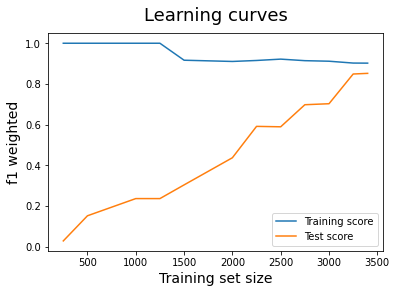

In [37]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('f1 weighted', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

# Code from here is using Linalgo's data

In [38]:
featured_df.document_id.nunique()

265

In [39]:
featured_train_df, featured_test_df = train_test_split(featured_df, test_size=0.2)

In [40]:
featured_X_train = featured_train_df.drop(['Entity', 'document_id'], axis = 1)
featured_X_test = featured_test_df.drop(['Entity', 'document_id'], axis = 1)
featured_X_train 

,top,bottom,left,right,area,width,height,aspect_ratio,x_diff,y_diff
2420,688.418889,709.235011,130.513793,243.515598,2352.259343,113.001805,20.816122,0.184211,-67.896943,-60.632383
15871,1181.832266,1197.444317,588.574325,668.195786,1243.054307,79.621460,15.612051,0.196078,0.000000,0.000000
8451,475.084622,496.716173,135.767947,219.203929,1804.849691,83.435982,21.631551,0.259259,-61.438523,-83.096372
4024,549.357241,594.165453,131.140828,257.839912,5677.159476,126.699084,44.808213,0.353659,-66.075360,-10.767092
6788,210.280424,234.138211,386.135559,950.769836,13470.923954,564.634277,23.857786,0.042254,-342.756864,-98.612184
...,...,...,...,...,...,...,...,...,...,...
14957,850.856784,868.030040,398.107302,505.830455,1849.957293,107.723152,17.173256,0.159420,0.000000,0.000000
846,804.711020,851.830440,387.148513,885.622378,23487.799435,498.473865,47.119420,0.094527,-312.292412,-96.050768
349,1181.353121,1202.763572,388.446738,567.286976,3829.050154,178.840238,21.410451,0.119718,-326.194518,-84.382366
10039,293.862833,315.638291,129.494333,225.808857,2097.292833,96.314524,21.775458,0.226087,-65.215683,-59.857974


In [41]:
ssscaler = StandardScaler()
# mmscaler = MinMaxScaler()

cols = ['top', 'bottom', 'left', 'right', 'area', 'width', 'height', 'aspect_ratio', 'x_diff', 'y_diff']
# df_cols = ['area', 'aspect_ratio', 'x_diff', 'y_diff']

featured_X_train[cols] = ssscaler.fit_transform(featured_X_train[cols])
featured_X_test[cols] = ssscaler.fit_transform(featured_X_test[cols])

# pred_train_df[cols] = mmscaler.fit_transform(pred_train_df[cols])
# pred_test_df[cols] = mmscaler.fit_transform(pred_test_df[cols])

In [42]:
abc.fit(featured_X_train, featured_train_df.Entity)
abc.score(featured_X_test, featured_test_df.Entity)

abc_results = cross_validate(abc, featured_X_train, featured_train_df.Entity, cv=5, scoring="f1_weighted")
abc_results['test_score'].mean()

0.9914255380435689

In [43]:
gbc.fit(featured_X_train, featured_train_df.Entity)
gbc.score(featured_X_test, featured_test_df.Entity)

gbc_results = cross_validate(abc, featured_X_train, featured_train_df.Entity, cv=5, scoring="f1_weighted")
gbc_results['test_score'].mean()

0.9910467225012205

In [44]:
from sklearn.model_selection import learning_curve

train_sizes = [50, 100, 250, 500, 750, 1000, 1500]
train_sizes, train_scores, test_scores = learning_curve(
    estimator=abc, X=featured_X_train, y=featured_train_df.Entity, train_sizes=train_sizes, cv=5, scoring="f1_weighted")

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

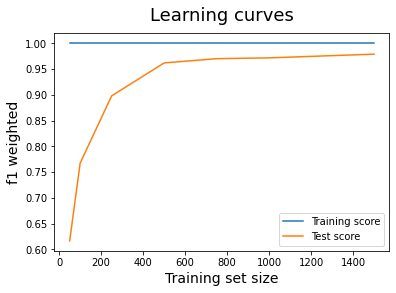

In [45]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('f1 weighted', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

# Code from here is for front-end

In [46]:
pred_test_df

,index,top,bottom,left,right,text,document_id,language,height,width,area,aspect_ratio,item_no,y_diff,x_diff,Entity,length
20642,34803,933.0,937.0,445.0,480.0,732,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9,item,4.0,35.0,140.0,0.114286,5,-758.0,440.0,item,3
20643,34804,937.0,962.0,874.0,919.0,1860,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9,item,25.0,45.0,1125.0,0.555556,5,-762.0,11.0,item,4
20644,34805,962.0,967.0,444.0,481.0,282,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9,item,5.0,37.0,185.0,0.135135,5,-787.0,441.0,item,3
20645,34806,967.0,995.0,903.0,920.0,4,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9,item,28.0,17.0,476.0,1.647059,5,-792.0,-18.0,item,1
20646,34807,995.0,996.0,446.0,480.0,781,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9,item,1.0,34.0,34.0,0.029412,5,-820.0,439.0,item,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25798,41694,1262.0,1276.0,142.0,193.0,しょうしょ,Document::ff13e9e1-7676-46d1-be8b-498424e173ff,ja,14.0,51.0,714.0,0.274510,7,-235.0,-43.0,word-jp,5
25799,41696,1262.0,1276.0,142.0,193.0,しょうしょ,Document::ff13e9e1-7676-46d1-be8b-498424e173ff,ja,14.0,51.0,714.0,0.274510,7,-235.0,-43.0,furi,5
25800,41702,1285.0,1303.0,395.0,712.0,Prices hawe been rising since last ycar,Document::ff13e9e1-7676-46d1-be8b-498424e173ff,en,18.0,317.0,5706.0,0.056782,7,-258.0,-296.0,sent-en,39
25801,41704,1307.0,1330.0,140.0,173.0,上弁,Document::ff13e9e1-7676-46d1-be8b-498424e173ff,none,23.0,33.0,759.0,0.696970,7,-280.0,-41.0,word-zh,2


In [47]:
X_test_before

,index,top,bottom,left,right,language,height,width,area,aspect_ratio,y_diff,x_diff,length
20642,34803,933.0,937.0,445.0,480.0,item,4.0,35.0,140.0,0.114286,-758.0,440.0,3
20643,34804,937.0,962.0,874.0,919.0,item,25.0,45.0,1125.0,0.555556,-762.0,11.0,4
20644,34805,962.0,967.0,444.0,481.0,item,5.0,37.0,185.0,0.135135,-787.0,441.0,3
20645,34806,967.0,995.0,903.0,920.0,item,28.0,17.0,476.0,1.647059,-792.0,-18.0,1
20646,34807,995.0,996.0,446.0,480.0,item,1.0,34.0,34.0,0.029412,-820.0,439.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25798,41694,1262.0,1276.0,142.0,193.0,ja,14.0,51.0,714.0,0.274510,-235.0,-43.0,5
25799,41696,1262.0,1276.0,142.0,193.0,ja,14.0,51.0,714.0,0.274510,-235.0,-43.0,5
25800,41702,1285.0,1303.0,395.0,712.0,en,18.0,317.0,5706.0,0.056782,-258.0,-296.0,39
25801,41704,1307.0,1330.0,140.0,173.0,none,23.0,33.0,759.0,0.696970,-280.0,-41.0,2


In [48]:
check = rfc.predict(X_test.head(5))
check[0]

1

In [49]:
check = pd.DataFrame(xgb.predict(X_test))
check

,0
0,1
1,1
2,1
3,1
4,1
...,...
5156,0
5157,0
5158,2
5159,7


In [50]:
prediction = pd.DataFrame()
prediction['text'] = pred_test_df.text
prediction['item_no'] = pred_test_df.item_no
prediction['document_id'] = pred_test_df.document_id
prediction = prediction.reset_index()
prediction['class_no'] = pd.DataFrame(rfc.predict(X_test))
prediction = prediction[['text', 'class_no', 'item_no', 'document_id']]
prediction.sort_values(by=['document_id','item_no'])
prediction.head(30) 

,text,class_no,item_no,document_id
0,732,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
1,1860,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
2,282,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
3,4,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
4,781,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
5,156,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
6,781,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
7,4,1,5,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
8,1071,1,6,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9
9,156,1,6,Document::d22795f5-a15c-4fa6-9a98-045d2648cfb9


['furi',
 'item',
 'sent-en',
 'sent-jp',
 'sent-zh',
 'word-en',
 'word-jp',
 'word-zh']

In [51]:
eng_df = prediction[prediction['class_no'] == 5][['text','item_no', 'document_id']]
jpn_df = prediction[prediction['class_no'] == 6][['text','item_no', 'document_id']]
zh_df = prediction[prediction['class_no'] == 7][['text','item_no', 'document_id']]
item_pred_df = prediction[prediction['class_no'] == 1][['text','item_no', 'document_id']]

eng_df.rename(columns = {'text':'word-en'}, inplace = True)
jpn_df.rename(columns = {'text':'word-jp'}, inplace = True)
zh_df.rename(columns = {'text':'word-zh'}, inplace = True)
item_pred_df.rename(columns = {'text':'item_id'}, inplace = True)

flashcards_df = item_pred_df.merge(jpn_df, how='left', on=(['document_id', 'item_no']))
flashcards_df = flashcards_df.merge(eng_df, how='left', on=(['document_id', 'item_no']))
flashcards_df = flashcards_df.merge(zh_df, how='left', on=(['document_id', 'item_no']))

# flashcards_df.drop(['document_id'], axis = 1, inplace=True)
flashcards_df = flashcards_df.dropna()
# flashcards_df = flashcards_df.drop_duplicates()
flashcards_df = flashcards_df.groupby(['document_id', 'item_no']).first().reset_index()

flashcards_df = flashcards_df.sort_values(by=['document_id', 'item_id', 'item_no'])
# flashcards_df.drop(['document_id', 'item_no'], axis = 1, inplace=True)

flashcards_df.head(20)

,document_id,item_no,item_id,word-jp,word-en,word-zh
0,Document::d5171829-4ed1-4dd4-b431-f52e12aa46de,0,511,最低限,mininnunn,長低限度
1,Document::d5171829-4ed1-4dd4-b431-f52e12aa46de,1,512,入手（する),obtain,状取。
2,Document::d5171829-4ed1-4dd4-b431-f52e12aa46de,4,514,名,anonymniS,歴名
3,Document::d5171829-4ed1-4dd4-b431-f52e12aa46de,5,515,中傷（する,critceism,中院
4,Document::d56010c3-379f-4dc5-a8ad-f3da0731c883,0,333,むしる,Pull nip pluck,斯下
5,Document::d56010c3-379f-4dc5-a8ad-f3da0731c883,5,337,丸める,rollinto a ball,排成団
6,Document::d56010c3-379f-4dc5-a8ad-f3da0731c883,6,339,まる,wlole,met
7,Document::d81a2de9-5aa1-456e-ac20-423fd038ca50,1,699,公的な,Dublc,公共的
8,Document::d81a2de9-5aa1-456e-ac20-423fd038ca50,2,700,公用,１ oficial,公秀
9,Document::d81a2de9-5aa1-456e-ac20-423fd038ca50,3,701,条例,ordimnance,余例


In [52]:
len(flashcards_df)

121

In [54]:
eng_df

,word-en,item_no,document_id
71,bosom,3,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
95,digit,5,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
114,percentagc DFODOTLOn,6,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
126,exactly,7,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
215,mininnunn,0,Document::d5171829-4ed1-4dd4-b431-f52e12aa46de
...,...,...,...
5091,mncaSufcS,2,Document::ff13e9e1-7676-46d1-be8b-498424e173ff
5107,manipulate,3,Document::ff13e9e1-7676-46d1-be8b-498424e173ff
5119,scatter about,5,Document::ff13e9e1-7676-46d1-be8b-498424e173ff
5133,amnouncement,6,Document::ff13e9e1-7676-46d1-be8b-498424e173ff


In [55]:
jpn_df

,word-jp,item_no,document_id
32,丸々「と1くする),0,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
47,手元,1,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
56,にちが,1,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
57,にちが,1,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
60,手よ,2,Document::d2dc196b-02fd-42bf-bb53-5635c8900c7d
...,...,...,...
5144,すいい,6,Document::ff13e9e1-7676-46d1-be8b-498424e173ff
5145,すいい,6,Document::ff13e9e1-7676-46d1-be8b-498424e173ff
5150,上昇（する),7,Document::ff13e9e1-7676-46d1-be8b-498424e173ff
5156,しょうしょ,7,Document::ff13e9e1-7676-46d1-be8b-498424e173ff


In [56]:
flashcards_df.drop(['document_id', 'item_no'], axis = 1, inplace=True)

In [57]:
flashcards_df.to_csv('test_flashcards.csv', index=False)